Importação das bibliotecas

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregar o dataset

In [126]:
dataset = pd.read_csv(r"C:\Users\bomfi\Documents\METAS 2026\DATA SCIENCE\Projetos Data Science\Analise-PIB-Municipios\data\dados.csv", sep=";")

dataset.head()


,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [127]:
dataset.tail()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58
186,60,GUARANI DAS MISSOES,24363.31,172.13


In [128]:
dataset.shape

(187, 4)

In [129]:
dataset.columns

Index(['CODIGO', 'MUNICIPIO', 'PIB', 'VALOREMPENHO'], dtype='object')

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CODIGO        187 non-null    int64  
 1   MUNICIPIO     187 non-null    object 
 2   PIB           187 non-null    float64
 3   VALOREMPENHO  187 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.0+ KB


In [131]:
dataset.describe()

,CODIGO,PIB,VALOREMPENHO
count,187.000000,187.000000,1.870000e+02
mean,247.155080,19808.741337,1.299844e+05
std,138.750385,16984.223244,1.615491e+05
min,1.000000,8236.630000,1.721300e+02
25%,141.000000,13621.455000,5.251718e+04
50%,242.000000,17206.190000,8.422816e+04
75%,372.500000,21429.165000,1.538961e+05
max,496.000000,223848.220000,1.442760e+06


O dataset contém informações economicas e de gastos públicos de municipios do Rio Grande do Sul, incluindo código, Nome, PIB e Valor empenhado em diárias.

CODIGO -> IDENTIFICADOR (CATEGÓRICO NOMINAL)
MUNICIPIO -> CATEGÓRICO NOMINAL
PIB -> NUMÉRICA CONTINUA
VALOREMPENHO -> NUMÉRICA CONTINUA

VERIFICAÇÃO DE QUALIDADE DOS DADOS

In [132]:
dataset.isnull().sum()
dataset.duplicated().sum()

np.int64(0)

FOI REALIZADO A VERIFICAÇÃO DE VALORES AUSENTES E INCONSISTENTES, A FIM DE GARANTIR A QUALIDADE DA ÁNALISE.

ANÁLISE UNIVARIADA

“A análise univariada da variável PIB, por meio das estatísticas descritivas, indica a presença de valores extremos no limite superior. O valor máximo é significativamente superior aos quartis e à mediana, sugerindo assimetria positiva na distribuição e possível influência de outliers, típicos de municípios com elevada atividade econômica.”

In [133]:
dataset["PIB"].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

 Análise Univariada — Variável PIB

Valores de referência:

Máximo: 223.848,22

Mediana (50%): 17.206,19

Terceiro quartil (75%): 21.429,17

Observa-se que o valor máximo é significativamente superior ao terceiro quartil, indicando a presença de valores extremos, o que sugere possível outlier no limite superior da distribuição.

📈 Média × Mediana (Assimetria)

Média: 19.808,74

Mediana: 17.206,19

A média é superior à mediana, indicando assimetria à direita, característica de distribuições influenciadas por valores elevados. Esse comportamento sugere que PIBs muito altos impactam a média, enquanto a mediana se mantém mais estável por ser resistente a extremos.

📊 Dispersão dos dados

Desvio padrão: 16.984,22

O desvio padrão elevado, próximo ao valor da média, indica alta dispersão dos dados, refletindo grande desigualdade entre os PIBs dos municípios analisados.

📌 Reforço da análise — IQR (Intervalo Interquartil)

Q1 (25%): 13.621,46

Q3 (75%): 21.429,17

IQR = Q3 − Q1 = 7.807,71


A faixa interquartil representa a região onde se concentra a maior parte dos dados.

O limite superior para detecção de outliers é dado por:

Q3 + 1,5 × IQR ≈ 33.141


Valores acima desse limite são considerados outliers estatísticos. O valor máximo observado (223.848,22) ultrapassa amplamente esse limite, caracterizando uma cauda longa à direita e reforçando a presença de assimetria positiva. Ressalta-se que tais valores não necessariamente representam erros, podendo corresponder a municípios com elevada atividade econômica.




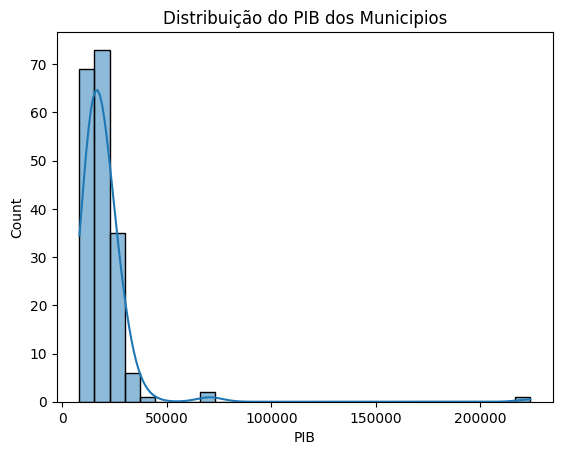

In [134]:
sns.histplot(dataset["PIB"], bins= 30, kde= True)
plt.title("Distribuição do PIB dos Municipios")
plt.show()

### 📊 Análise do Histograma — PIB dos Municípios

O histograma da variável PIB evidencia uma distribuição assimétrica à direita, caracterizada por uma elevada concentração de observações nos menores valores e pela presença de uma cauda longa no limite superior da distribuição. Esse comportamento indica que a maioria dos municípios apresenta PIB relativamente baixo, enquanto poucos municípios concentram valores significativamente elevados.

A presença de barras isoladas em níveis mais altos reforça a existência de valores extremos, previamente identificados por meio das estatísticas descritivas e do intervalo interquartil (IQR). Tais valores exercem influência sobre a média, contribuindo para que esta se apresente superior à mediana, ao passo que a mediana permanece mais representativa do centro da distribuição.

Esse padrão é compatível com a realidade econômica dos municípios, nos quais poucos centros concentram elevada atividade econômica em contraste com a maioria das localidades.


In [135]:
dataset["VALOREMPENHO"].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

Análise Univariada — Variável VALOREMPENHO

Valores de referência:

Mínimo: 172

Primeiro quartil (25%): 52.517

Mediana (50%): 84.228

Terceiro quartil (75%): 153.896

Máximo: 1.442.760

Observa-se que o valor máximo é expressivamente superior ao terceiro quartil, indicando a presença de valores extremos no limite superior da distribuição, o que sugere forte indício de outliers.

📈 Média × Mediana (Assimetria)

Média: 129.984

Mediana: 84.228

A média apresenta-se substancialmente superior à mediana, caracterizando assimetria à direita (positiva). Esse padrão indica que valores elevados de empenho influenciam a média, enquanto a mediana se mantém como uma medida mais robusta da tendência central por ser menos sensível a extremos.

📊 Dispersão dos dados

Desvio padrão: 161.549

O desvio padrão elevado, superior ao valor da média, evidencia alta dispersão dos dados e grande heterogeneidade entre os valores de empenho analisados, reforçando a presença de observações de grande magnitude.

📌 Reforço da análise — IQR (Intervalo Interquartil)

Q1 (25%): 52.517

Q3 (75%): 153.896

IQR = Q3 − Q1 = 101.379


A faixa interquartil representa a região onde se concentra a maior parte dos dados.

O limite superior para detecção de outliers é definido por:

Q3 + 1,5 × IQR ≈ 305.964


Valores acima desse limite são considerados outliers estatísticos. O valor máximo observado (1.442.760) ultrapassa amplamente esse limiar, caracterizando uma cauda longa à direita e confirmando a assimetria positiva da distribuição. Ressalta-se que tais outliers não necessariamente representam erros, podendo refletir empenhos de elevado valor econômico.

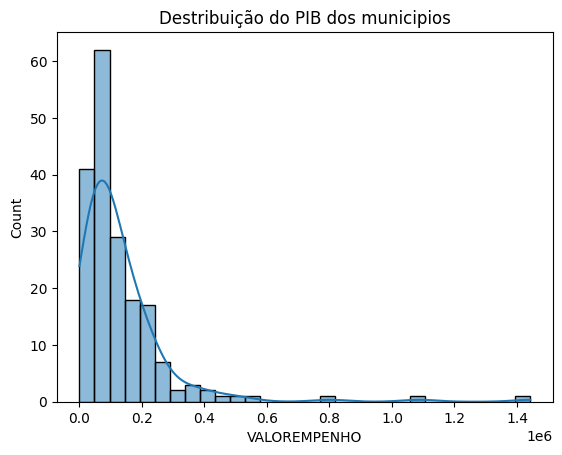

In [136]:
sns.histplot(dataset["VALOREMPENHO"], bins= 30, kde = True)
plt.title("Destribuição do PIB dos municipios")
plt.show()

O gráfico de distribuição do valor empenhado em diárias mostra uma assimetria positiva acentuada, com grande concentração de municípios em faixas de menor valor e poucos municípios apresentando valores significativamente elevados. Esse comportamento indica a presença de outliers e sugere que a média pode não ser uma medida representativa adequada, sendo a mediana uma alternativa mais robusta para análise.

Análise bivariada - Relação PIB × Empenho

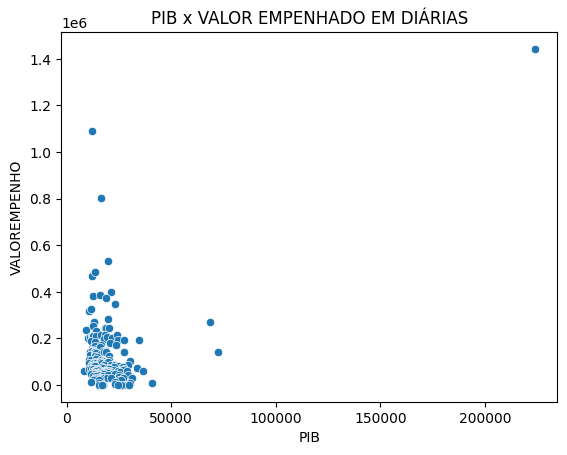

In [137]:
sns.scatterplot(data = dataset, x = "PIB", y = "VALOREMPENHO")
plt.title("PIB x VALOR EMPENHADO EM DIÁRIAS")
plt.show()

A análise bivariada entre o PIB dos municípios e o valor empenhado em diárias indica ausência de uma relação linear forte entre as variáveis. Observa-se grande dispersão dos dados e concentração de municípios em faixas de baixo PIB e baixo valor empenhado, além da presença de outliers que podem influenciar medidas estatísticas tradicionais.

CORRELAÇÃO

In [138]:
dataset[['PIB', 'VALOREMPENHO']].corr()

,PIB,VALOREMPENHO
PIB,1.000000,0.484487
VALOREMPENHO,0.484487,1.000000


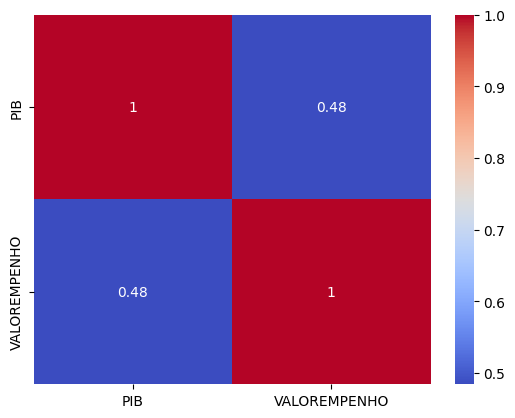

In [139]:
sns.heatmap(dataset[['PIB', 'VALOREMPENHO']].corr(), annot=True, cmap='coolwarm')
plt.show()

A matriz de correlação indica uma correlação positiva moderada (r = 0,48) entre o PIB dos municípios e o valor empenhado em diárias. Esse resultado sugere que municípios economicamente mais desenvolvidos tendem a apresentar maiores gastos, embora a relação não seja suficientemente forte para afirmar dependência direta entre as variáveis.

Identificação de outliers

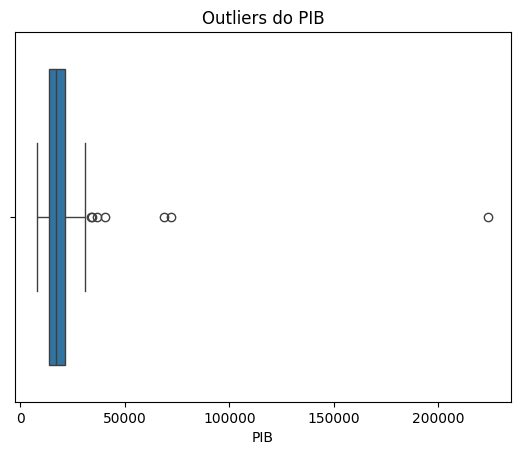

In [140]:
sns.boxplot(x=dataset['PIB'])
plt.title("Outliers do PIB")
plt.show()

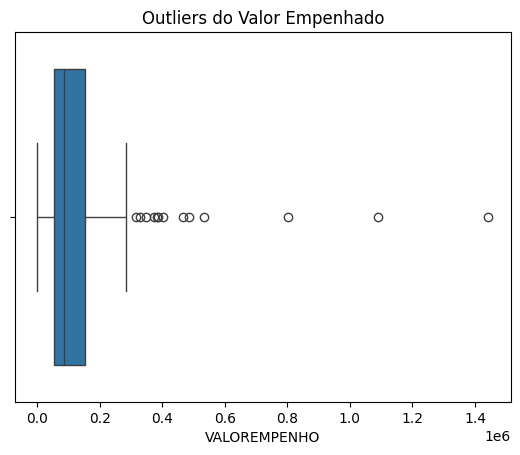

In [141]:
sns.boxplot(x=dataset['VALOREMPENHO'])
plt.title("Outliers do Valor Empenhado")
plt.show()


A análise de outliers, por meio de boxplots, evidencia forte assimetria positiva tanto no PIB quanto no valor empenhado em diárias. Observa-se que poucos municípios concentram valores significativamente superiores à maioria, caracterizando a presença de outliers que podem influenciar as análises estatísticas e a interpretação da correlação entre as variáveis.

CONCLUSÃO

A Análise Exploratória de Dados realizada sobre o PIB dos municípios gaúchos e o valor empenhado em diárias permitiu compreender o comportamento e a relação entre essas variáveis. Observou-se que ambas apresentam distribuições assimétricas à direita, com forte concentração da maioria dos municípios em faixas de valores mais baixos e presença de outliers relevantes, representando municípios de maior porte econômico e administrativo.

A análise bivariada indicou grande dispersão dos dados, evidenciando que o aumento do PIB não implica, necessariamente, um crescimento proporcional no valor empenhado em diárias. Esse comportamento foi confirmado pela análise de correlação, que apresentou um coeficiente positivo moderado (r = 0,48), sugerindo que o PIB exerce influência parcial sobre os gastos, mas não é um fator explicativo suficiente de forma isolada.

A presença de outliers tanto no PIB quanto no valor empenhado reforça a necessidade de cautela na interpretação de medidas estatísticas tradicionais, como a média, sendo a mediana uma alternativa mais robusta para esse conjunto de dados. Além disso, os resultados indicam que outros fatores — como características administrativas, populacionais ou políticas — podem desempenhar papel relevante na determinação dos gastos em diárias.

Por fim, esta análise cumpre seu objetivo exploratório ao identificar padrões, variabilidade e limitações dos dados, servindo como base para estudos futuros mais aprofundados, que podem incluir normalização dos gastos pelo PIB, incorporação de dados populacionais ou aplicação de métodos estatísticos e modelos mais avançados.